# List 5

## Imports


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [2]:
import stats as sts
import linear_model as lm
import metrics as mts
import resample as rs

## Read Pima Indians

In [3]:
data = pd.read_csv('../datasets/pima-indians-diabetes.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    768 non-null int64
8    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Sets

In [7]:
X = data.values[:,:8]
y = data.values[:,8]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
sk_logistic_model = linear_model.LogisticRegression()
logistic_model = lm.LogisticRegression(500,0.00001)

In [10]:
sk_logistic_model.fit(X_train,y_train)
y_pred_sk = sk_logistic_model.predict(X_test)

In [11]:
beta = logistic_model.fit(X_train, y_train)

After step 1, likelihood: [-372.22003596]; accuracy: 349.0


/home/unknown/github/machine-learning/library/linear_model.py:47: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(1 - y_hat)) + np.dot(y.T, x_beta)


## Compare

### Scikit

In [12]:
sk_acc = accuracy_score(y_test,y_pred_sk)
sk_prec = precision_score(y_test,y_pred_sk)
sk_recall = recall_score(y_test,y_pred_sk)
sk_f1 = f1_score(y_test,y_pred_sk)

sk_acc, sk_prec, sk_recall, sk_f1

(0.7575757575757576, 0.6621621621621622, 0.6125, 0.6363636363636365)

### Own

In [14]:
acc = mts.accuracy(y_test,y_pred_sk)
prec = mts.precision(y_test,y_pred_sk)
recall = mts.recall(y_test,y_pred_sk)
f1 = mts.f1_measure(y_test,y_pred_sk)

acc, prec, recall, f1

[[126  25]
 [ 31  49]]
[[126  25]
 [ 31  49]]


(0.7575757575757576,
 [0.802547770700637, 0.6621621621621622],
 [0.8344370860927153, 0.6125],
 array([0.81818182, 0.63636364]))

##  AUC (Area Under Curve)

In [15]:
lr_model = linear_model.LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_score = lr_model.predict_proba(X_test)[:,1]
y_score[:10]

array([0.33456936, 0.22370192, 0.19683111, 0.22101156, 0.44880753,
       0.42221301, 0.05567237, 0.66269031, 0.5295349 , 0.67618672])

In [19]:
roc_auc_score(y_test, y_score)

0.8059602649006623

##  Curva ROC 

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

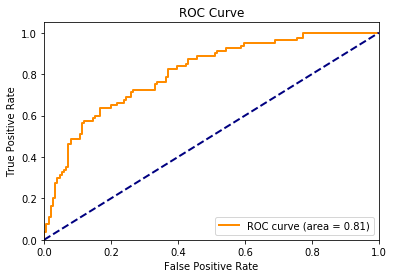

In [21]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()